In [23]:
import pandas as pd
import random
import seaborn as sb

In [4]:
df = pd.read_csv('../datasets/birdclef22/train_metadata.csv')
df.sample(10)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
6047,grbher3,[],"['call', 'flight call']",28.2267,-80.7645,Ardea herodias,Great Blue Heron,Paul Marvin,Creative Commons Attribution-NonCommercial-Sha...,4.0,07:59,https://www.xeno-canto.org/192289,grbher3/XC192289.ogg
12821,sheowl,[],"['flight call', 'short and long call']",48.5547,1.8649,Asio flammeus,Short-eared Owl,Stanislas Wroza,Creative Commons Attribution-NonCommercial-Sha...,4.0,17:00,https://www.xeno-canto.org/522575,sheowl/XC522575.ogg
14576,whiter,[],['call'],-22.6530,-152.7970,Gygis alba,White Tern,Todd Mark,Creative Commons Attribution-NonCommercial-Sha...,3.0,13:00,https://www.xeno-canto.org/75213,whiter/XC75213.ogg
11281,refboo,[],"['call', 'juvenile']",-15.8876,54.5191,Sula sula,Red-footed Booby,Daniel Danckwerts,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/233892,refboo/XC233892.ogg
11005,pibgre,[],['call'],32.6287,-116.9230,Podilymbus podiceps,Pied-billed Grebe,Paul Marvin,Creative Commons Attribution-NonCommercial-Sha...,5.0,06:57,https://www.xeno-canto.org/585734,pibgre/XC585734.ogg
3306,comgal1,[],['call'],25.7324,-109.0271,Gallinula galeata,Common Gallinule,Manuel Grosselet,Creative Commons Attribution-NonCommercial-Sha...,4.5,08:00,https://www.xeno-canto.org/488261,comgal1/XC488261.ogg
6217,gwfgoo,[],['call'],49.9182,-6.2871,Anser albifrons,Greater White-fronted Goose,Ashley Fisher,Creative Commons Attribution-NonCommercial-Sha...,4.5,12:16,https://www.xeno-canto.org/126034,gwfgoo/XC126034.ogg
11044,pibgre,['amewig'],"['adult', 'extra-pair interaction calls', 'fem...",31.3400,-109.2730,Podilymbus podiceps,Pied-billed Grebe,Richard E. Webster,Creative Commons Attribution-NonCommercial-Sha...,4.5,12:32,https://www.xeno-canto.org/624583,pibgre/XC624583.ogg
5702,gnwtea,[],['call'],45.9507,5.1053,Anas crecca,Green-winged Teal,Vincent Pourchaire,Creative Commons Attribution-NonCommercial-Sha...,5.0,10:00,https://www.xeno-canto.org/447479,gnwtea/XC447479.ogg
10630,pecsan,[],['flight call'],71.2973,-156.7737,Calidris melanotos,Pectoral Sandpiper,Patrik Åberg,Creative Commons Attribution-NonCommercial-Sha...,4.0,22:50,https://www.xeno-canto.org/406452,pecsan/XC406452.ogg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     14852 non-null  object 
 1   secondary_labels  14852 non-null  object 
 2   type              14852 non-null  object 
 3   latitude          14852 non-null  float64
 4   longitude         14852 non-null  float64
 5   scientific_name   14852 non-null  object 
 6   common_name       14852 non-null  object 
 7   author            14852 non-null  object 
 8   license           14852 non-null  object 
 9   rating            14852 non-null  float64
 10  time              14852 non-null  object 
 11  url               14852 non-null  object 
 12  filename          14852 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.5+ MB


## Analyse DF

In [27]:
df.secondary_labels.count()

14852

## Analyze some random audio

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
from IPython.display import Audio
!pip install -qq noisereduce
import noisereduce as nr
import os

In [7]:
def plot_spec(signal,sr=None, fig=None, ax=None, method='fft', show_onset=True):
    
    if fig==None or ax==None:
        fig, ax = plt.subplots()
    
    if method=='fft':
        D = librosa.stft(signal, n_fft=2048)  # STFT of y
        data = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        img = librosa.display.specshow(data, x_axis='time', y_axis='log', ax=ax)
        ax.set(title='FFT Log Spectogram')
        fig.colorbar(img, ax=ax, format="%+2.f dB")
    
    if method=='mel':
        M = librosa.feature.melspectrogram(y=signal, sr=sr)
        data = librosa.power_to_db(M, ref=np.max)
        fig, ax = plt.subplots()
        img = librosa.display.specshow(data, y_axis='mel', x_axis='time', ax=ax)
        ax.set(title='Mel Spectogram')
        fig.colorbar(img, ax=ax, format="%+2.f dB")
        
    if show_onset:
        o_env = librosa.onset.onset_strength(y=signal, sr=sr)
        times = librosa.times_like(o_env, sr=sr)
        onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
        idxs = librosa.onset.onset_detect(y=audio, sr=sr, units='samples')
        ax.vlines(times[onset_frames], 0, data.shape[1], color='b', alpha=0.9,linestyle='--', label='Onsets')
        
    return fig
    
def create_slices(length, sl, overlap=0):
    assert sl > overlap
    idx = 0
    slices = []
    while(idx < length - sl):
        slices.append((idx, idx+sl-1))
        idx += sl - overlap
    return slices

In [8]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [9]:
sr = 32_000
fmin = 100
fmax=15_000

In [17]:
random_file = random.choice(df["filename"].values) # random file
path = f"../datasets/birdclef22/train_audio/{random_file}"
df[df["filename"] == random_file]

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
6899,houspa,[],['call'],43.4385,4.5978,Passer domesticus,House Sparrow,PAULUS,Creative Commons Attribution-NonCommercial-Sha...,2.5,20:00,https://www.xeno-canto.org/141631,houspa/XC141631.ogg


In [18]:
audio, sr = librosa.load(path, sr=sr, res_type='kaiser_fast')
audio_filtered = butter_bandpass_filter(audio, fmin, fmax,sr,5)
reducted = nr.reduce_noise(y=audio, sr=sr, stationary=True)
reducted_2 = nr.reduce_noise(y=reducted, sr=sr, stationary=False)

In [19]:
Audio(data=audio, rate=sr)

(64, 1276)


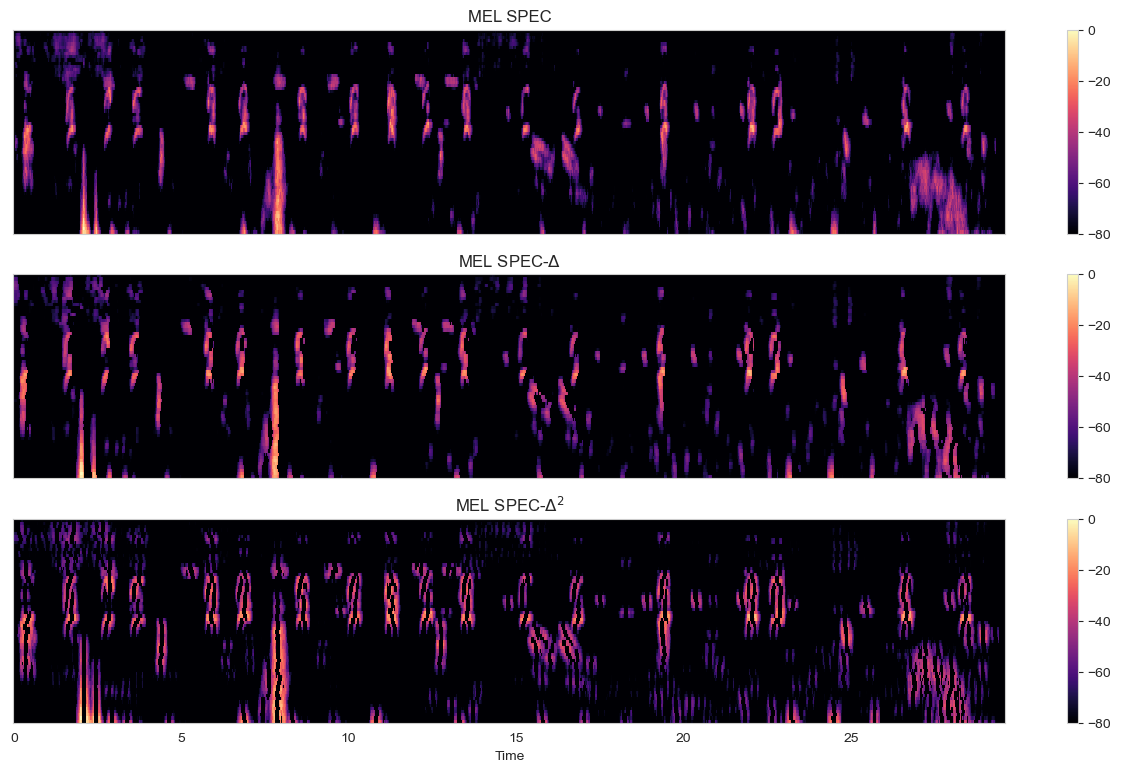

In [20]:
mfcc = librosa.feature.melspectrogram(y=reducted_2, sr=sr, fmin=fmin, fmax=fmax, n_mels=64, n_fft=1024)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

mfcc = librosa.power_to_db(mfcc, ref=np.max)
mfcc_delta = librosa.power_to_db(mfcc_delta, ref=np.max)
mfcc_delta2 = librosa.power_to_db(mfcc_delta2, ref=np.max)

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(16,9))

img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')

ax[0].set(title='MEL SPEC')

ax[0].label_outer()

img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')

ax[1].set(title=r'MEL SPEC-$\Delta$')

ax[1].label_outer()

img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')

ax[2].set(title=r'MEL SPEC-$\Delta^2$')

fig.colorbar(img1, ax=[ax[0]])

fig.colorbar(img2, ax=[ax[1]])

fig.colorbar(img3, ax=[ax[2]])
print(mfcc.shape)

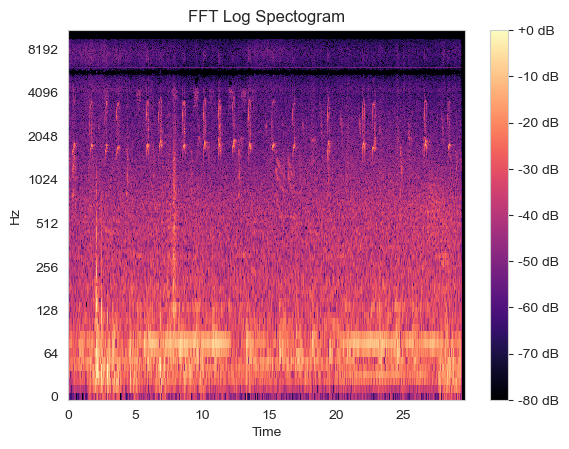

In [21]:
fig = plot_spec(audio, sr, method='fft', show_onset=False)